## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

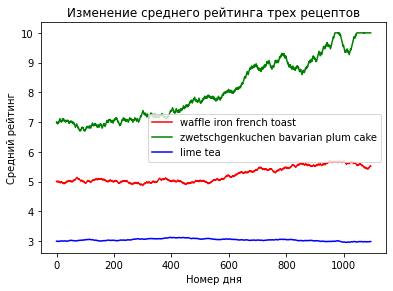

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
ar_1 = np.load('average_ratings.npy')
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
line1, = ax.plot(ar_1[0],'r',label = 'waffle iron french toast')
line2, = ax.plot(ar_1[1],'g',label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(ar_1[2],'b', label = 'lime tea')
ax.legend(handles = [line1,line2,line3])
ax.set_title('Изменение среднего рейтинга трех рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


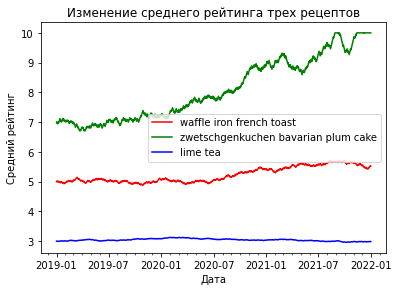

In [4]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
dt = pd.date_range(start='01.01.2019',end='30.12.2021')
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
line1, = ax.plot(dt,ar_1[0],'r',label = 'waffle iron french toast')
line2, = ax.plot(dt,ar_1[1],'g',label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(dt,ar_1[2],'b', label = 'lime tea')
ax.legend(handles = [line1,line2,line3])
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

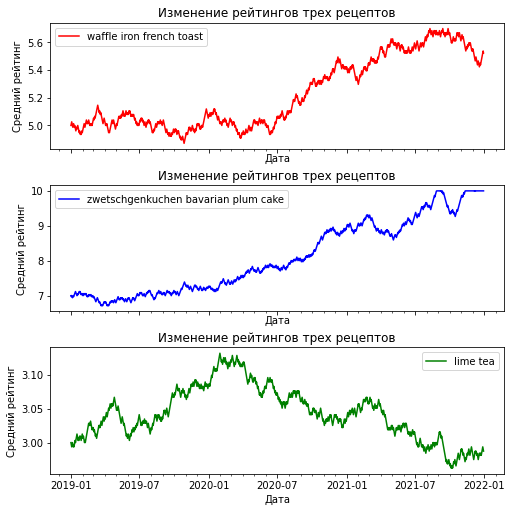

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(7, 7), layout='constrained', sharex=True)
line1, = axs[0].plot(dt, ar_1[0],'r',label = 'waffle iron french toast')
line2, = axs[1].plot(dt, ar_1[1],'b',label = 'zwetschgenkuchen bavarian plum cake')
line3, = axs[2].plot(dt, ar_1[2],'g',label = 'lime tea')
axs[0].legend(handles = [line1])
axs[1].legend(handles = [line2])
axs[2].legend(handles = [line3])
for axx in axs:
    axx.set_title(r'Изменение рейтингов трех рецептов')
    axx.set_ylabel(r'Средний рейтинг')
    axx.set_xlabel(r'Дата')
    axx.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    axx.xaxis.set_minor_locator(mdates.MonthLocator())

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


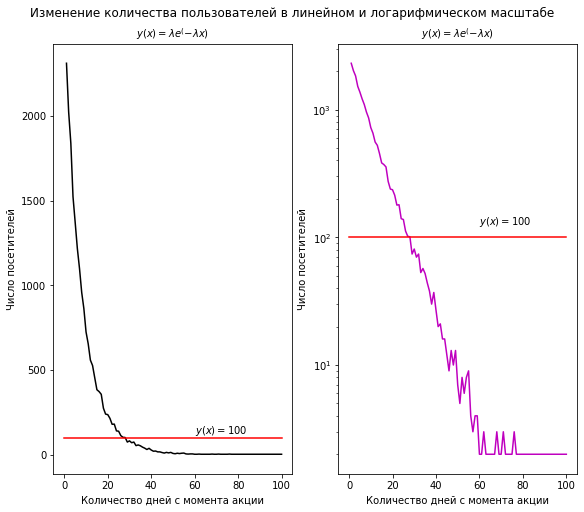

In [6]:
ar_2 = np.load('visitors.npy')
fig, axs = plt.subplots(1, 2,figsize=(8, 7),layout='constrained')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
x = np.arange(1,101)
x1,y1 = [0,100],[100,100]
line1, = axs[0].plot(x,ar_2,'k',label='1')
line2, = axs[1].plot(x,ar_2,'m',label='1')
axs[1].set_yscale('log')
for ax in axs:
    ax.set_title('$y(x)=λe^(-λx)$', fontsize='medium')
    ax.set_ylabel('Число посетителей')
    ax.set_xlabel('Количество дней с момента акции')
    line3, = ax.plot(x1,y1,'r',label='$y(x)=100$')
    ax.annotate('$y(x)=100$', xy=(60, 100), xytext=(60, 125))

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [7]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')
r_c = recipes.copy()

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

<AxesSubplot:title={'center':'Размеры групп рецептов'}, ylabel='a'>

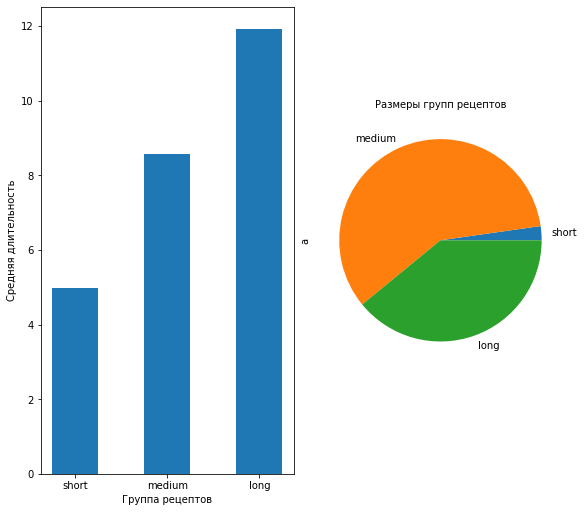

In [8]:
shrt = recipes[recipes['minutes']<5]
md = recipes[(recipes['minutes']>=5)&(recipes['minutes']<50)]
lng = recipes[recipes['minutes']>=50]
ar_d = pd.DataFrame({'a':np.array([shrt.shape[0],md.shape[0],lng.shape[0]])},index=['short','medium','long'])
data1 = {'short':np.mean(shrt['n_steps']),'medium':np.mean(md['n_steps']),'long':np.mean(lng['n_steps'])}
data1
fig, axs = plt.subplots(1, 2,figsize=(8, 7),layout='constrained')
courses1 = list(data1.keys())
values1 = list(data1.values())
axs[0].bar(courses1,values1,width = 0.5)
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Средняя длительность')
axs[1].set_title('Размеры групп рецептов',fontsize='medium')
ar_d.a.plot(kind='pie')


6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

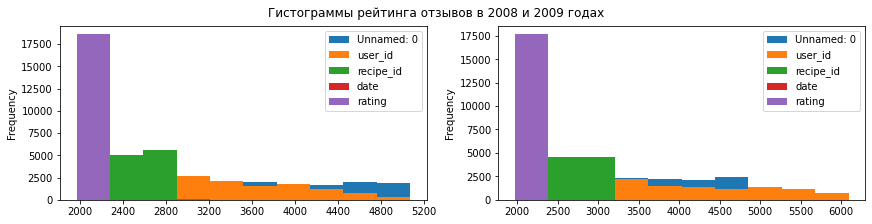

In [9]:
reviews['date'] = pd.to_datetime(reviews['date'])
chng = reviews[(reviews['date'].dt.year==2009)|(reviews['date'].dt.year==2008)]
chng_1 = chng[chng['date'].dt.year==2008]
chng_2 = chng[chng['date'].dt.year==2009]
fig = plt.figure(figsize=(12,3),layout='constrained')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
chng_1.plot(ax=ax1,kind='hist')
chng_2.plot(ax=ax2,kind='hist')
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

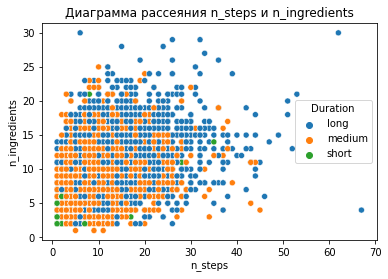

In [10]:
rec = recipes[['n_steps','n_ingredients']]
recipes.loc[recipes['minutes']<5,'Duration'] = 'short'
recipes.loc[recipes['minutes']>=50,'Duration'] = 'long'
recipes.loc[(recipes['minutes']>=5)&(recipes['minutes']<50),'Duration'] = 'medium'
ax = sns.scatterplot(data = rec,x='n_steps',y='n_ingredients',hue=recipes.Duration)
ax.set_title('Диаграмма рассеяния n_steps и n_ingredients');

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

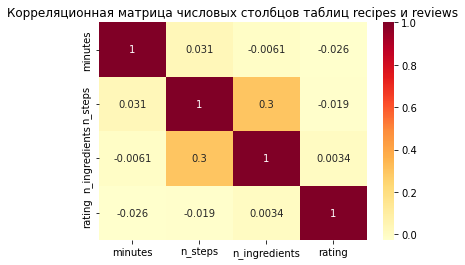

In [11]:
reviews.rename({'recipe_id': 'id'},axis=1,inplace=True)
mrgd = r_c.merge(reviews,how='outer')
mrgd_1 = mrgd[["minutes", "n_steps", "n_ingredients", "rating"]]
ax = sns.heatmap(mrgd_1.corr(), annot = True,cmap='YlOrRd')
ax.set_title("Корреляционная матрица числовых столбцов таблиц recipes и reviews");